# Olympics Games: México
Data Analysis and visualization of participation of the Mexican National Team in the Olympic Games.
Sources: https://www.kaggle.com/pavanraj159/olympics-history-1896-2016/?select=athlete_events.csv#data
### Initial questions:
    Distribution of competitions with the Mexico National Team?
    What sports gives to Mexico National Team more medals?
    What sports are the most effective for the Mexico National Team?
    Which athletes give to Mexico National Team more medals?
    Which athletes are the most effective for the Mexico National Team?
    

In [148]:
#import libraries and extract data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
#unzip the file with the data
with zipfile.ZipFile('athlete_events.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
#Open csv
athlete_events = pd.read_csv('athlete_events.csv')
#Inspect the type of data
athlete_events.info()
athlete_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [149]:
#Numeric variables
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


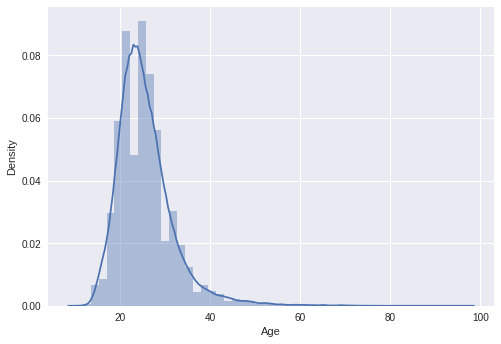

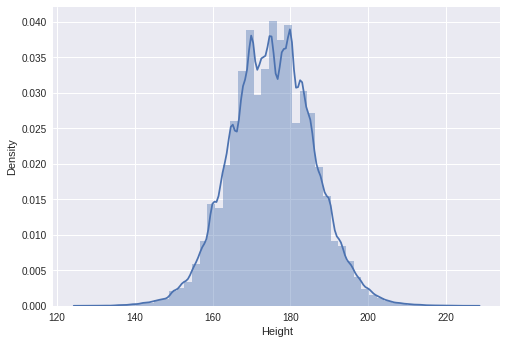

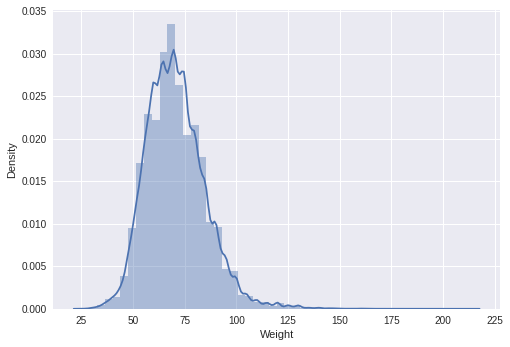

In [150]:

#General athletes distribution Age/Height/Weight
sns.distplot(athlete_events['Age'], hist=True)
plt.show()
sns.distplot(athlete_events['Height'], hist=True)
plt.show()
sns.distplot(athlete_events['Weight'], hist=True)
plt.show()


## Mexican athletes


In [151]:
print("General athletes: ")
print(athlete_events.ID.count())
## Filter Mexican Athletes
mexican_athlete = athlete_events[athlete_events['Team']=='Mexico']
print("Mexican athletes: ")
print(mexican_athlete.ID.count())

General athletes: 
271116
Mexican athletes: 
2857


In [152]:
mexican_athlete.describe()

,ID,Age,Height,Weight,Year
count,2857.000000,2652.000000,2420.000000,2299.000000,2857.000000
mean,64453.933147,24.433258,171.886364,65.878860,1977.112356
std,40245.949537,6.646066,9.615634,11.281614,22.822026
min,82.000000,12.000000,127.000000,36.000000,1924.000000
25%,29580.000000,20.000000,166.000000,58.000000,1964.000000
50%,71351.000000,23.000000,172.000000,66.000000,1972.000000
75%,100954.000000,27.000000,178.000000,72.000000,1992.000000
max,135421.000000,57.000000,204.000000,125.000000,2016.000000


In [153]:
#Missed values
mexican_athlete.isna().sum()

ID           0
Name         0
Sex          0
Age        205
Height     437
Weight     558
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     2750
dtype: int64

In [154]:
#Fill missed values (age, weight, height) by mean group by Sport.
mexican_athlete['Age'] = mexican_athlete.groupby("Sport").Age.transform(lambda x: x.fillna(x.mean())).astype(int)
mexican_athlete['Weight'] = mexican_athlete.groupby("Sport").Weight.transform(lambda x: x.fillna(x.mean()))
mexican_athlete['Height'] = mexican_athlete.groupby("Sport").Height.transform(lambda x: x.fillna(x.mean()))

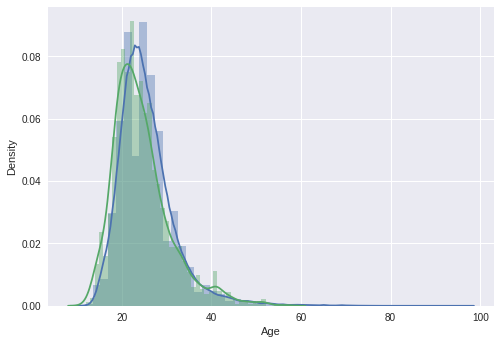

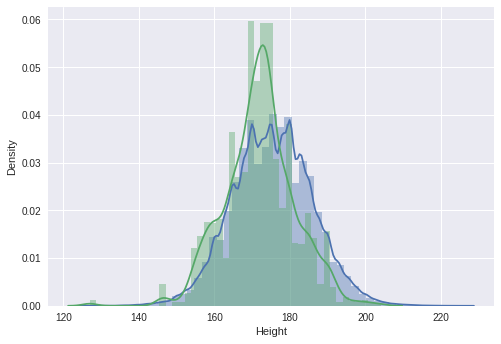

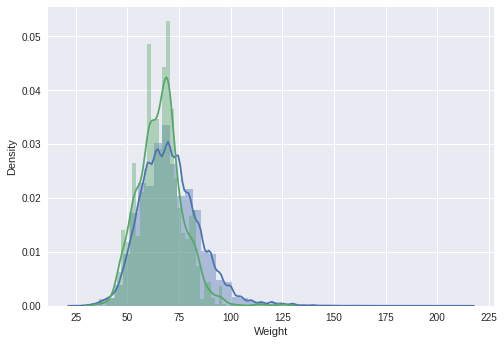

In [156]:
#Comparation distribution of mexican athletes with general.
sns.distplot(athlete_events['Age'], hist=True)
sns.distplot(mexican_athlete['Age'], hist=True)
plt.show()
sns.distplot(athlete_events['Height'], hist=True)
sns.distplot(mexican_athlete['Height'], hist=True)
plt.show()
sns.distplot(athlete_events['Weight'], hist=True)
sns.distplot(mexican_athlete['Weight'], hist=True)
plt.show()

In [157]:
#What sports gives to Mexico National Team more medals?
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

def points(str):
    if(str=='Gold'):
        return 3
    elif(str=='Silver'):
        return 2
    else:
        return 1

#Filter mexican medalists by sports
mexican_medals = mexican_athlete[pd.notna(mexican_athlete['Medal'])]
mexican_medals_sports=mexican_medals.groupby(['Sport'])['Medal'].count()
#In the dataset we have medalists by athletes, we need by teams. We'll group team medals
mexican_medals_sports

#calculate pts per Games (gold=3 pts, silver=2 pts, bronce=1 pts)

#mexican_athlete.plot(kind='bar',title='Mexican')
#plt.show()


# Plot of mexican medals
#mexican_medals_athlete.plot(x=mexican_medals_athlete['Games'], y=sum(mexican_medals_athlete['Medal']))
#plt.show()


#mexican_gold_athlete = mexican_medals_athlete[mexican_athlete['Medal']=='Gold']
#mexican_silver_athlete = mexican_medals_athlete[mexican_athlete['Medal']=='Silver']
#mexican_bronce_athlete = mexican_medals_athlete[mexican_athlete['Medal']=='Bronce']
#plt.hist(x=mexican_medals_athlete['Games'], y=mexican_medals_athlete['Medal'])

Sport
Archery               2
Athletics            11
Basketball           11
Boxing               13
Cycling               2
Diving               17
Equestrianism        17
Fencing               1
Football             16
Modern Pentathlon     1
Polo                  4
Shooting              1
Swimming              2
Taekwondo             7
Weightlifting         1
Wrestling             1
Name: Medal, dtype: int64